In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citypy module to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Import the datetime module from the datetime library 
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations

# declare each array as a variable
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
# pack the lats and lngs as pairs by zipping them
# there will be 1500 tuples of paired lats and lngs
lat_lngs = zip(lats, lngs)
# the output is a zip object in memory
# each lat and long in a tuple can be accessed by the index of 0 and 1
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Iterate through our zipped lat_lngs tuple and find the nearest city

# 1. Create a list for holding the city names
cities = []

# 2. Identify the nearest city for each lat lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # 3. If the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

# 4. Print the city count to confirm sufficient count
len(cities)

604

In [8]:
# Create a base URL for the API call & set to a variable 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our "cities" list
# use the enumerate() method as an alt. way to iterate through list & recieve both index and city
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    # Check if the remainder of the index divided by 50 == 0
    # Check if the index is greater than or equal to 50
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    # remove the blank spaces in the city name and concatenate the city name
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the URL, record count, set count and the city being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count before the next city is processed
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city_data list with a dictionary for that city
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        # pass is a general purpose statement to handle all errors encountered
        # will allow the program to continue
        pass
    
# Indicate the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bosaso
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | marcona
City not found. Skipping...
Processing Record 12 of Set 1 | tshikapa
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | saint quentin
City not found. Skipping...
Processing Record 16 of Set 1 | yarada
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | igarka
Processing Record 19 of Set 1 | kruisfontein
Processing Record 

Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | ituni
City not found. Skipping...
Processing Record 39 of Set 4 | velyka lepetykha
Processing Record 40 of Set 4 | chaman
Processing Record 41 of Set 4 | junqueiro
Processing Record 42 of Set 4 | mocuba
Processing Record 43 of Set 4 | kalevala
Processing Record 44 of Set 4 | visnes
Processing Record 45 of Set 4 | alcantara
Processing Record 46 of Set 4 | monrovia
Processing Record 47 of Set 4 | teguldet
Processing Record 48 of Set 4 | madingou
Processing Record 49 of Set 4 | marienburg
Processing Record 50 of Set 4 | tallahassee
Processing Record 1 of Set 5 | sulina
Processing Record 2 of Set 5 | saurimo
Processing Record 3 of Set 5 | ilebo
Processing Record 4 of Set 5 | soyo
Processing Record 5 of Set 5 | idlib
Processing Record 6 of Set 5 | lere
Processing Record 7 of Set 5 | marijampole
Processing Record 8 of Set 5 | arlit
Processing Record 9 of Set 5 | manzil tamim
City not found. Skipping...
Processing Record 1

Processing Record 30 of Set 8 | rutul
Processing Record 31 of Set 8 | macedo de cavaleiros
Processing Record 32 of Set 8 | eskasem
City not found. Skipping...
Processing Record 33 of Set 8 | marystown
Processing Record 34 of Set 8 | iracoubo
Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | aksu
Processing Record 37 of Set 8 | misratah
Processing Record 38 of Set 8 | havre-saint-pierre
Processing Record 39 of Set 8 | santa ana
Processing Record 40 of Set 8 | sulya
Processing Record 41 of Set 8 | corinto
Processing Record 42 of Set 8 | kumluca
Processing Record 43 of Set 8 | los andes
Processing Record 44 of Set 8 | hagerstown
Processing Record 45 of Set 8 | samsun
Processing Record 46 of Set 8 | kargasok
Processing Record 47 of Set 8 | ambilobe
Processing Record 48 of Set 8 | zaysan
Processing Record 49 of Set 8 | araci
Processing Record 50 of Set 8 | sinkat
City not found. Skipping...
Processing Record 1 of Set 9 | santiago
Processing Record 2 of Set 9 | jiwani
Proc

Processing Record 18 of Set 12 | tacuati
Processing Record 19 of Set 12 | agadir
Processing Record 20 of Set 12 | payyannur
Processing Record 21 of Set 12 | sechura
Processing Record 22 of Set 12 | miraflores
Processing Record 23 of Set 12 | melfi
Processing Record 24 of Set 12 | kama
Processing Record 25 of Set 12 | soni
Processing Record 26 of Set 12 | guasdualito
Processing Record 27 of Set 12 | sayville
Processing Record 28 of Set 12 | adrasmon
Processing Record 29 of Set 12 | riachao
Processing Record 30 of Set 12 | notre-dame-du-lac
Processing Record 31 of Set 12 | eucaliptus
Processing Record 32 of Set 12 | iquique
Processing Record 33 of Set 12 | urubicha
Processing Record 34 of Set 12 | vicuna
Processing Record 35 of Set 12 | salinopolis
Processing Record 36 of Set 12 | palmares do sul
Processing Record 37 of Set 12 | maturin
Processing Record 38 of Set 12 | axim
Processing Record 39 of Set 12 | aksarka
Processing Record 40 of Set 12 | rudnichnyy
Processing Record 41 of Set 12

In [10]:
# Tally the number of cities in the city_data array of dictionaries 
# check to make sure you got more than 500 cities
len(city_data)

557

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bosaso,11.28,49.18,92.53,47,96,2.13,SO,2020-07-09 18:45:20
1,Busselton,-33.65,115.33,41.00,86,0,7.25,AU,2020-07-09 18:45:20
2,Saint-Philippe,-21.36,55.77,69.80,88,40,21.92,RE,2020-07-09 18:45:21
3,Port Alfred,-33.59,26.89,68.00,64,0,7.00,ZA,2020-07-09 18:45:21
4,Jamestown,42.10,-79.24,87.80,48,40,6.93,US,2020-07-09 18:45:22
5,Sao Joao Da Barra,-21.64,-41.05,82.40,54,0,16.11,BR,2020-07-09 18:45:23
6,Upernavik,72.79,-56.15,43.32,70,100,8.88,GL,2020-07-09 18:44:55
7,Hermanus,-34.42,19.23,53.01,88,100,7.00,ZA,2020-07-09 18:42:39
8,Tshikapa,-6.42,20.80,84.96,27,91,1.14,CD,2020-07-09 18:45:26
9,Georgetown,5.41,100.34,80.60,94,20,3.87,MY,2020-07-09 18:40:40


In [12]:
# Reorder the columns as:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed

# Assign a variable to an array of the columns in the order we want
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign the df the new column order
city_data_df = city_data_df[new_column_order]

# Display the DataFrame
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bosaso,SO,2020-07-09 18:45:20,11.28,49.18,92.53,47,96,2.13
1,Busselton,AU,2020-07-09 18:45:20,-33.65,115.33,41.00,86,0,7.25
2,Saint-Philippe,RE,2020-07-09 18:45:21,-21.36,55.77,69.80,88,40,21.92
3,Port Alfred,ZA,2020-07-09 18:45:21,-33.59,26.89,68.00,64,0,7.00
4,Jamestown,US,2020-07-09 18:45:22,42.10,-79.24,87.80,48,40,6.93
...,...,...,...,...,...,...,...,...,...
552,Lipari,IT,2020-07-09 18:47:22,38.47,14.95,80.01,79,0,1.99
553,Thompson,CA,2020-07-09 18:47:22,55.74,-97.86,64.40,82,90,12.75
554,Carutapera,BR,2020-07-09 18:47:22,-1.20,-46.02,82.78,79,83,7.96
555,Deshnok,IN,2020-07-09 18:47:23,27.80,73.34,94.03,44,9,23.20


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module
import time

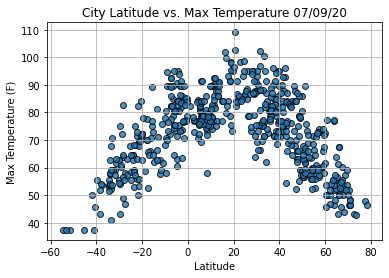

In [17]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (F) " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

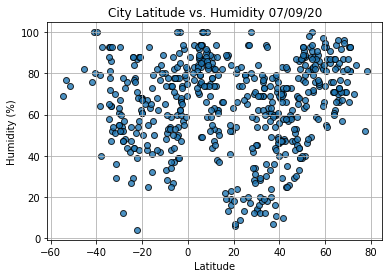

In [18]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

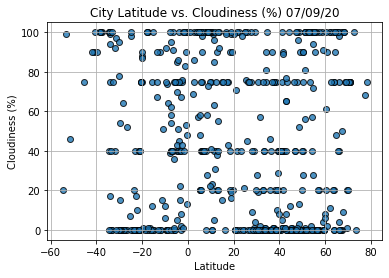

In [19]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

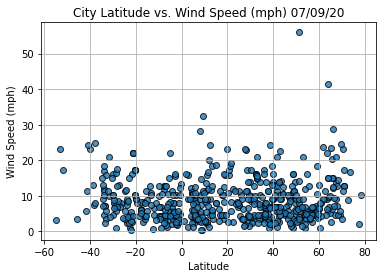

In [20]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed, 
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()